<a href="https://colab.research.google.com/github/s331440/data/blob/main/4510_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Read data

In [1]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score, make_scorer, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#dataset from https://www.kaggle.com/datasets/dgawlik/nyse 
stock = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/prices-split-adjusted.csv', index_col=0, parse_dates=True)

In [4]:
stock.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [5]:
stock.tail()

,symbol,open,close,low,high,volume
date,,,,,,
2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


In [7]:
stock.shape

(851264, 6)

In [8]:
stock.dtypes

symbol     object
open      float64
close     float64
low       float64
high      float64
volume    float64
dtype: object

### Acessing data


In [9]:
stock.index

DatetimeIndex(['2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-11', '2016-01-12', '2016-01-13', '2016-01-14',
               '2016-01-15', '2016-01-19',
               ...
               '2016-12-30', '2016-12-30', '2016-12-30', '2016-12-30',
               '2016-12-30', '2016-12-30', '2016-12-30', '2016-12-30',
               '2016-12-30', '2016-12-30'],
              dtype='datetime64[ns]', name='date', length=851264, freq=None)

In [10]:
stock.columns

Index(['symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [11]:
stock["close"]

date
2016-01-05    125.839996
2016-01-06    119.980003
2016-01-07    114.949997
2016-01-08    116.620003
2016-01-11    114.970001
                 ...    
2016-12-30    103.199997
2016-12-30     43.040001
2016-12-30     53.529999
2016-12-30     45.450001
2016-12-30     53.630001
Name: close, Length: 851264, dtype: float64

In [12]:
stock[0:3]

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0


### Process the data (statistical analysis... modelling)

In [13]:
stock.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [14]:
#Auto["Total Equity"]=Auto["Total Equity"].astype('category')

In [15]:
stock.describe(include='all')

,symbol,open,close,low,high,volume
count,851264,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
unique,501,NaN,NaN,NaN,NaN,NaN
top,KSU,NaN,NaN,NaN,NaN,NaN
freq,1762,NaN,NaN,NaN,NaN,NaN
mean,NaN,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,NaN,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,NaN,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,NaN,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,NaN,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,NaN,75.120003,75.139999,74.400002,75.849998,5.222500e+06


In [16]:
#Another way to get the mean and standerd deviation, it gives the same result as seen in the describe function
print(np.mean(stock['close']), np.std(stock['close']))

65.01191274222055 75.20117183675055


In [17]:
stock['open'].corr(stock['close'])

0.9998446804441614

In [18]:
np.corrcoef(stock['open'],stock['close'])

array([[1.        , 0.99984468],
       [0.99984468, 1.        ]])

### Plot (visualization)

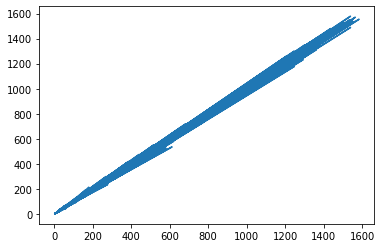

In [19]:
#all the plots and histograms in this section won't get explained in the report since the seaborn pairplot is a better visualisation of the reshaped dataset.
#this section is kept since it shows plots of the whole dataset and not just the reshaped one.
plt.plot(stock['open'],stock['close'])

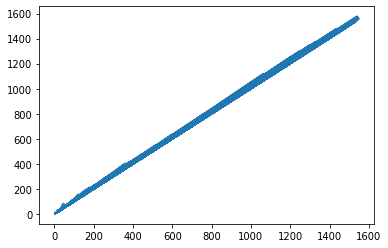

In [20]:
plt.plot(stock['low'],stock['close'])

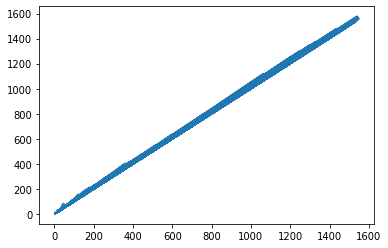

In [21]:
plt.plot(stock['low'],stock['close'])

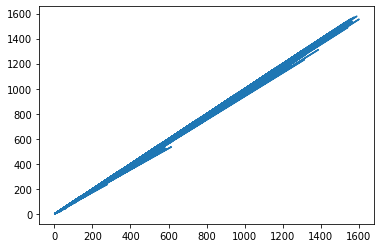

In [22]:
plt.plot(stock['high'],stock['close'])

(array([6.70157e+05, 1.41451e+05, 2.15250e+04, 7.35600e+03, 3.32400e+03,
        1.63500e+03, 1.91000e+03, 9.73000e+02, 8.95000e+02, 9.39000e+02,
        2.19000e+02, 3.80000e+01, 4.40000e+01, 7.60000e+01, 1.98000e+02,
        1.98000e+02, 1.83000e+02, 5.40000e+01, 6.80000e+01, 2.10000e+01]),
 array([   1.66      ,   80.79899705,  159.9379941 ,  239.07699115,
         318.2159882 ,  397.35498525,  476.4939823 ,  555.63297935,
         634.7719764 ,  713.91097345,  793.0499705 ,  872.18896755,
         951.3279646 , 1030.46696165, 1109.6059587 , 1188.74495575,
        1267.8839528 , 1347.02294985, 1426.1619469 , 1505.30094395,
        1584.439941  ]),
 <a list of 20 Patch objects>)

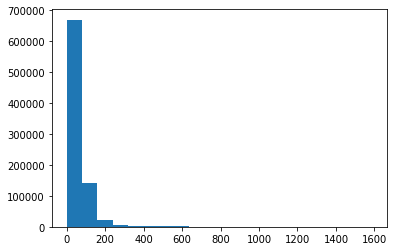

In [23]:
plt.hist(stock['open'],20)

(array([6.68190e+05, 1.43021e+05, 2.18060e+04, 7.42000e+03, 3.32800e+03,
        1.66400e+03, 1.89000e+03, 9.84000e+02, 8.97000e+02, 9.42000e+02,
        2.42000e+02, 3.50000e+01, 4.40000e+01, 7.70000e+01, 1.91000e+02,
        1.93000e+02, 1.82000e+02, 6.40000e+01, 6.90000e+01, 2.50000e+01]),
 array([   1.59      ,   80.41700025,  159.2440005 ,  238.07100075,
         316.898001  ,  395.72500125,  474.5520015 ,  553.37900175,
         632.206002  ,  711.03300225,  789.8600025 ,  868.68700275,
         947.514003  , 1026.34100325, 1105.1680035 , 1183.99500375,
        1262.822004  , 1341.64900425, 1420.4760045 , 1499.30300475,
        1578.130005  ]),
 <a list of 20 Patch objects>)

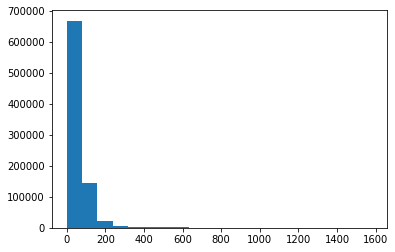

In [24]:
plt.hist(stock['close'],20)

(array([6.64431e+05, 1.46115e+05, 2.22610e+04, 7.49300e+03, 3.38000e+03,
        1.73900e+03, 1.81200e+03, 1.03200e+03, 8.85000e+02, 9.18000e+02,
        3.18000e+02, 2.50000e+01, 5.10000e+01, 7.40000e+01, 1.62000e+02,
        2.14000e+02, 1.83000e+02, 6.10000e+01, 7.30000e+01, 3.70000e+01]),
 array([1.50000000e+00, 7.89219971e+01, 1.56343994e+02, 2.33765991e+02,
        3.11187988e+02, 3.88609985e+02, 4.66031982e+02, 5.43453979e+02,
        6.20875976e+02, 6.98297973e+02, 7.75719971e+02, 8.53141968e+02,
        9.30563965e+02, 1.00798596e+03, 1.08540796e+03, 1.16282996e+03,
        1.24025195e+03, 1.31767395e+03, 1.39509595e+03, 1.47251794e+03,
        1.54993994e+03]),
 <a list of 20 Patch objects>)

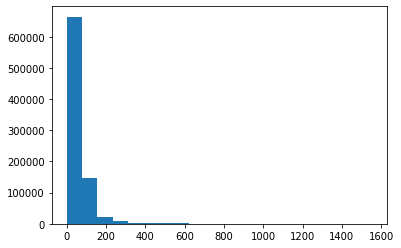

In [25]:
plt.hist(stock['low'],20)

(array([6.71257e+05, 1.40435e+05, 2.14880e+04, 7.32100e+03, 3.29800e+03,
        1.63900e+03, 1.94400e+03, 9.63000e+02, 8.98000e+02, 9.43000e+02,
        1.98000e+02, 3.90000e+01, 4.10000e+01, 7.40000e+01, 2.14000e+02,
        1.89000e+02, 1.81000e+02, 5.50000e+01, 6.60000e+01, 2.10000e+01]),
 array([   1.81     ,   81.7660027,  161.7220054,  241.6780081,
         321.6340108,  401.5900135,  481.5460162,  561.5020189,
         641.4580216,  721.4140243,  801.370027 ,  881.3260297,
         961.2820324, 1041.2380351, 1121.1940378, 1201.1500405,
        1281.1060432, 1361.0620459, 1441.0180486, 1520.9740513,
        1600.930054 ]),
 <a list of 20 Patch objects>)

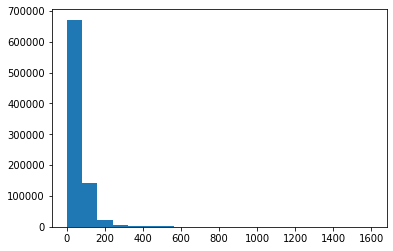

In [26]:
plt.hist(stock['high'],20)

(array([8.40219e+05, 7.84600e+03, 1.71200e+03, 7.24000e+02, 3.34000e+02,
        2.04000e+02, 9.10000e+01, 5.60000e+01, 2.90000e+01, 8.00000e+00,
        1.50000e+01, 1.00000e+01, 4.00000e+00, 6.00000e+00, 2.00000e+00,
        3.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0.0000000e+00, 4.2982170e+07, 8.5964340e+07, 1.2894651e+08,
        1.7192868e+08, 2.1491085e+08, 2.5789302e+08, 3.0087519e+08,
        3.4385736e+08, 3.8683953e+08, 4.2982170e+08, 4.7280387e+08,
        5.1578604e+08, 5.5876821e+08, 6.0175038e+08, 6.4473255e+08,
        6.8771472e+08, 7.3069689e+08, 7.7367906e+08, 8.1666123e+08,
        8.5964340e+08]),
 <a list of 20 Patch objects>)

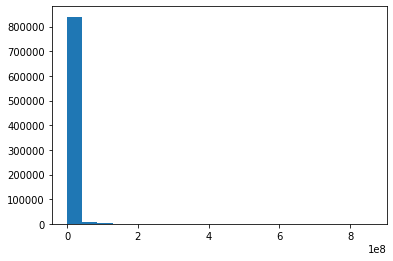

In [27]:
plt.hist(stock['volume'],20)

### Save your results

In [28]:
plt.savefig('results.png')

<Figure size 432x288 with 0 Axes>

In [29]:
fig1 = plt.gcf()

<Figure size 432x288 with 0 Axes>

In [30]:
fig1.savefig('results2.png', dpi=100)

In [31]:
# Function code from: https://www.kaggle.com/code/l33tc0d3r/stock-price-prediction/notebook 

In [32]:
for i in stock.columns:
  print(i,"\t-\t", stock[i].isna().mean()*100)

symbol 	-	 0.0
open 	-	 0.0
close 	-	 0.0
low 	-	 0.0
high 	-	 0.0
volume 	-	 0.0


In [33]:
stock = stock[stock['symbol']=='AAPL']   # Choosin stock values for any company 

cormap = stock.corr()

In [34]:
cormap

,open,close,low,high,volume
open,1.000000,0.999254,0.999605,0.999673,-0.582824
close,0.999254,1.000000,0.999657,0.999660,-0.585669
low,0.999605,0.999657,1.000000,0.999511,-0.591664
high,0.999673,0.999660,0.999511,1.000000,-0.578681
volume,-0.582824,-0.585669,-0.591664,-0.578681,1.000000


In [35]:
def get_correlated_col(cor_dat, threshold): 
  # Cor_data to be column along which correlation to be measured 
  #Threshold be the value above which of correlation to considered
  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  stock = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return stock


In [36]:
top_correlated_values = get_correlated_col(cormap['close'], 0.60)
top_correlated_values

,corr value
open,0.999254
close,1.000000
low,0.999657
high,0.999660


In [37]:
stock = stock[top_correlated_values.index]
stock.head()

,open,close,low,high
date,,,,
2010-01-04,30.490000,30.572857,30.340000,30.642857
2010-01-05,30.657143,30.625713,30.464285,30.798571
2010-01-06,30.625713,30.138571,30.107143,30.747143
2010-01-07,30.250000,30.082857,29.864286,30.285715
2010-01-08,30.042856,30.282858,29.865715,30.285715


In [38]:
stock.tail()

,open,close,low,high
date,,,,
2016-12-23,115.589996,116.519997,115.589996,116.519997
2016-12-27,116.519997,117.260002,116.489998,117.800003
2016-12-28,117.519997,116.760002,116.199997,118.019997
2016-12-29,116.449997,116.730003,116.400002,117.110001
2016-12-30,116.650002,115.820000,115.430000,117.199997


In [39]:
stock.shape

(1762, 4)

In [40]:
stock.describe(include='all')

,open,close,low,high
count,1762.000000,1762.000000,1762.000000,1762.000000
mean,79.427744,79.402683,78.640034,80.140447
std,28.339001,28.330794,28.108525,28.561027
min,27.481428,27.435715,27.178572,28.000000
25%,55.401787,55.450000,54.672501,55.909286
50%,78.742146,78.435711,77.631428,79.344284
75%,102.979998,103.092503,102.500000,104.424997
max,134.460007,133.000000,131.399994,134.539993


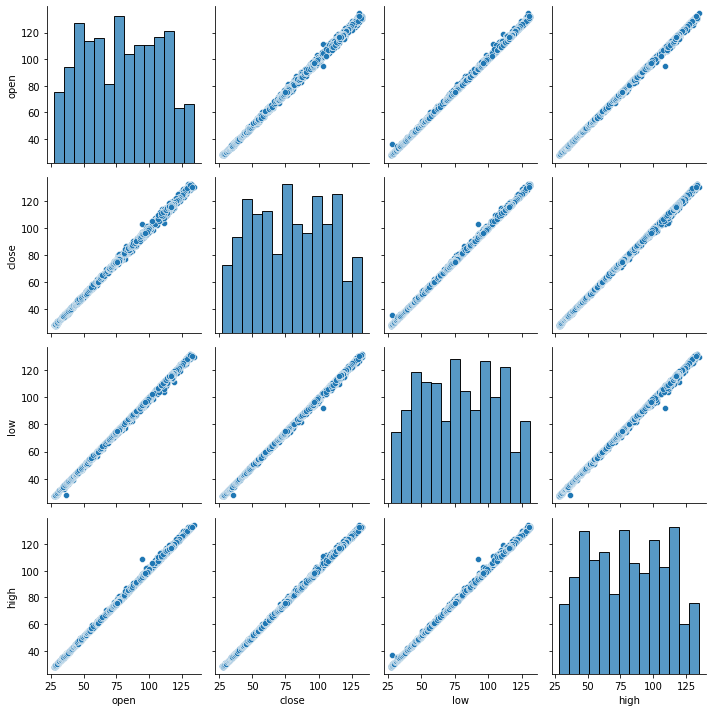

In [41]:
sns.pairplot(stock)
plt.tight_layout()

In [42]:
X = stock.drop(['close'], axis=1)
y = stock['close']

In [43]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,open,low,high
0,0.028123,0.030334,0.024806
1,0.029686,0.031526,0.026268
2,0.029392,0.028100,0.025785
3,0.025880,0.025769,0.021454
4,0.023943,0.025783,0.021454


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []


In [45]:
# model training

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [46]:
# prediction
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
date,,
2015-08-10,119.720001,119.448049
2015-08-11,113.489998,114.710233
2015-08-12,115.239998,112.815248
2015-08-13,115.150002,115.130405
2015-08-14,115.959999,115.721472


In [47]:
# Measure the Accuracy Score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9942881676356083


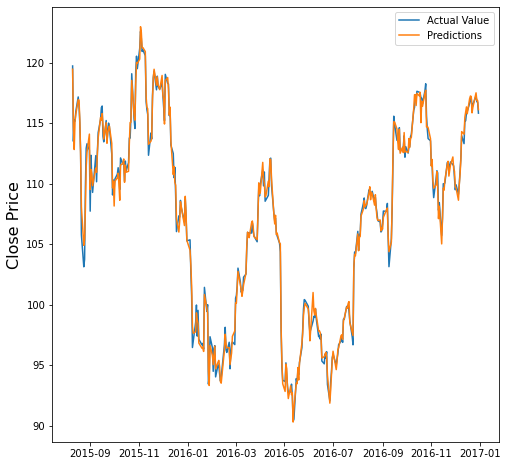

In [48]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [49]:
# Load modules and data

stock = sm.datasets.scotland.load()

stock.exog = sm.add_constant(stock.exog)

# Instantiate a gamma family model with the default link function.
gamma_model = sm.GLM(stock.endog, stock.exog, family=sm.families.Gamma())

gamma_results = gamma_model.fit()

print(gamma_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   32
Model:                            GLM   Df Residuals:                       24
Model Family:                   Gamma   Df Model:                            7
Link Function:          inverse_power   Scale:                       0.0035843
Method:                          IRLS   Log-Likelihood:                -83.017
Date:                Thu, 17 Nov 2022   Deviance:                     0.087389
Time:                        13:36:36   Pearson chi2:                   0.0860
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0178      0.011     -1.548      0.1

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:296: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


In [50]:
# Function code from: Arvind Keprate's AI modeling_ACIT assignment in ACIT4020 course

In [51]:
mean_absolute_error(y_test, y_pred_1)

0.45078832775907784

In [52]:
mean_absolute_percentage_error(y_test, y_pred_1)

0.004233282571063176

In [53]:
np.sqrt(mean_squared_error(y_test, y_pred_1))

0.6030753214821

In [54]:
#This section does not work, but are included to show how I tried to implement cross-validation to the project unsuccesfully. Big speces between lines indicate new cell.
# Function code from: https://www.youtube.com/watch?v=gJo0uNL-5Qw&t=898s 

from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, cross_val_score, LeaveOneOut,\
RepeatedKFold, train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)
kf = KFold(n_splits=3)
kf

#X is digits.data (training set), y is digits.target (test set)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)


# Function code for next two lines from: https://towardsdatascience.com/valueerror-sklearn-fix-4a5fe105536a
label_encoder = preprocessing.LabelEncoder()
train_Y = label_encoder.fit_transform(y_train)



from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], y, \
                                       y[train_index], y[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))



    scores_logistic


    scores_svm


    scores_rf

ValueError: ignored